# Grey radiation

This notebook describes the [grey radiation model](https://github.com/jduffield65/ClimateModel/blob/93531b01aa740f3dede0b2944db8710c083c3a91/Model/radiation/grey.py) and goes through some examples of things that can be done with it.

The basis of this model is to produce the vertically one dimensional structure of the atmosphere given a concentration distribution of greenhouse gases. 

I used chapters 10 and 14 of [Atmospheric Circulation Dynamics and General Circulation Models](https://www.springer.com/gp/book/9783642135736) and chapter 4 of [Principles of Planetary Climate](https://www.cambridge.org/gb/academic/subjects/earth-and-environmental-science/climatology-and-climate-change/principles-planetary-climate?format=HB&isbn=9780521865562) to help produce the model.

## Model description
### Conservation of energy
The total energy of the atmosphere is given by:
\begin{equation}
\rho e^{tot} = \frac{1}{2}\rho \pmb{v}^2 + \rho \Phi + \rho u
\label{eq: 1}\tag{1}
\end{equation}
This is the sum of kinetic energy, gravitational potential energy ($\Phi = gz$) and internal energy. There is no source of total energy, meaning it is conserved:
\begin{equation}
\frac{\partial}{\partial t}(\rho e^{etot}) + \nabla \cdot \pmb{F}^{etot} = 0
\label{eq: 2}\tag{2}
\end{equation}
Where $\textbf{F}^{etot}$ is the flux density vector of total energy determined by the the balance equations for each component of $e^{tot}$.

\begin{equation}
\frac{\partial \rho}{\partial t} + \nabla \cdot (\rho \pmb{v}) = 0
\label{eq: 3}\tag{3}
\end{equation}

\begin{equation}
\frac{d\pmb{v}}{dt} + 2\pmb{\Omega} \times \pmb{v} =  -\frac{1}{\rho}\nabla p - \nabla \Phi
\label{eq: 4}\tag{4}
\end{equation}

Using $(2)$ along with conservation of mass $(3)$ and conservation of momentum $(4)$ as well as the fact $\frac{\partial \Phi}{\partial t}=0$, we can obtain an equation for the evolution of kinetic and potential energy in flux form (note that $\frac{d}{dt} = \frac{\partial}{\partial t} + \pmb{v} \cdot \nabla$):

\begin{equation}
\frac{\partial}{\partial t}(\frac{1}{2}\rho \pmb{v}^2) + \nabla \cdot \left[ \left(\frac{1}{2}\rho \pmb{v}^2 + p\right)\pmb{v} \right] = p \nabla \cdot \pmb{v} - \rho \cdot \nabla \Phi
\label{eq: 5}\tag{5}
\end{equation}

\begin{equation}
\frac{\partial}{\partial t}(\rho \Phi) + \nabla \cdot \left(\rho \Phi \pmb{v}\right) = \rho \pmb{v}\cdot \nabla \Phi
\label{eq: 6}\tag{6}
\end{equation}

We can determine the internal energy equation by noting that the right hand sides (RHS) of $(5)$ and $(6)$ are source terms of energy so the source term for the internal energy equation must be $-p \nabla \cdot \pmb{v}$ so the source term of total energy (sum of RHS of $(5)$, $(6)$ and $(7)$) equals $0$ as to satisfy equation $(2)$. Thus the internal energy equation is:

\begin{equation}
\frac{\partial}{\partial t}(\rho u) + \nabla \cdot \left(\rho u \pmb{v} + \pmb{F}\right) = -p \nabla \cdot \pmb{v}
\label{eq: 7}\tag{7}
\end{equation}


$\pmb{F}$ is the flux density of internal energy other than the advection term i.e. it is the heat flux. In the grey radiation model, we assume the only contribution is from radiation (as opposed to sensible heat - molecular thermal diffusion). 

We want to use all these equations to get an expression for how temperature, $T$, responds to changes in $\pmb{F}$. We can combine $(7)$ and $(3)$ to give:

\begin{equation}
\rho \left(\frac{du}{dt} + p\frac{dv_s}{dt}\right) = -\nabla \cdot \pmb{F}
\label{eq: 8}\tag{8}
\end{equation}

Where $v_s = 1/ \rho$ is specific volume. If we then use the definition of enthalpy, $dh = du + d(pv_s)$, we get an expression for the evolution of enthalpy:

\begin{equation}
\rho \frac{dh}{dt} = \frac{dp}{dt} - \nabla \cdot \pmb{F}
\label{eq: 9}\tag{9}
\end{equation}

We can then use $h = c_pT$ where $c_p$ is the heat capacity of air at constant pressure per unit mass (units are J/K/kg). We are also only interested in a 1D vertical ($\nabla \rightarrow \frac{\partial}{\partial z}$), static ($\pmb{v} \rightarrow 0$) atmosphere in this section. Under these conditions, $\frac{d}{dt} \rightarrow \frac{\partial}{\partial t}$, $(3)$ gives $\rho = constant$, $(4)$ gives $\frac{\partial p}{\partial t} = 0$ and $\frac{\partial}{\partial z} = -g\rho \frac{\partial}{\partial p}$. This gives our final temperature equation:

\begin{equation}
\frac{\partial T}{\partial t} = \frac{g}{c_p}\frac{\partial F}{\partial p}
\label{eq: 10}\tag{10}
\end{equation}

[In the model](https://github.com/jduffield65/ClimateModel/blob/93531b01aa740f3dede0b2944db8710c083c3a91/Model/radiation/grey.py#L283-L285), we discretize this using a finite volume method (pressure and flux are at the boundaries of a cell whereas temperature is at the cell centre):

\begin{equation}
\frac{T^{n+1}_{i+1/2} - T^{n}_{i+1/2}}{\Delta t} = \frac{g}{c_p}\frac{F^{n}_{i+1} - F^{n}_i}{p_{i+1} - p_i}
\label{eq: 11}\tag{11}
\end{equation}

Where $i$ indicates grid position and $n$ indicates time.

### Flux equation
Now to complete the equation, we want to find an expression for $F$ as a function of $T$ and $p$.

Lets consider a slab of atmosphere of thickness $\Delta z$ containing a gas with mass density $q(z)$ and absorption coefficient $k_{\nu}(z)$ at frequency ${\nu}$. Let there be an upwelling flux, $F^{\uparrow}_{\nu}(z)$ at the bottom of the slab and an upwelling flux $F^{\uparrow}_{\nu}(z+\Delta z)$ at the top. There is a change in flux because the layer of atmosphere absorbs and emits radiation. According to Kirchoff's law, emissivity = absorptivity = $e_{\nu}$ and we have:

\begin{equation}
F^{\uparrow}_{\nu}(z+\Delta z) = (1-e_{\nu})F^{\uparrow}_{\nu}(z) + e_{\nu}B(\nu, T)
\label{eq: 12}\tag{12}
\end{equation}

This means that the radiation flux that reaches the top of this slab of atmosphere is equal to the amount that was incident upon the bottom of the slab minus the amount absorbed by the slab plus the amount emitted by the slab. We assume local thermodynamic equilibrium so the emitted radiation follows the blackbody distribution, $B(\nu, T)$. The emissivity is given by $e_{\nu} = q(z)k_{\nu}(z)\Delta z$ and if we sub this into $(12)$, and take the limit $\Delta z \rightarrow 0$:

\begin{equation}
\frac{dF^{\uparrow}_{\nu}}{dz} = -qk_{\nu}F^{\uparrow}_{\nu} + qk_{\nu}B(\nu, T)
\label{eq: 13}\tag{13}
\end{equation}

If we now define optical depth, $\tau_{\nu}$ such that $d\tau_{\nu} = qkdz$, we get:

\begin{equation}
\frac{dF^{\uparrow}_{\nu}}{d\tau_{\nu}} = -F^{\uparrow}_{\nu} + B(\nu, T)
\label{eq: 14}\tag{14}
\end{equation}

Optical depth increases as you move down through the atmosphere, coming from space ($\tau_{\nu} = 0$ at the top of the atmosphere), and can be though of as the effective distance travelled by light at a particular frequency give the interaction with the gas. The more the gas interacts with the light, the greater the optical depth. Going through the same analysis but considering the downwelling radiation incident upon the top of the slab, we get:

\begin{equation}
F^{\downarrow}_{\nu}(z-\Delta z) = (1-e_{\nu})F^{\downarrow}_{\nu}(z) + e_{\nu}B(\nu, T)
\label{eq: 15}\tag{15}
\end{equation}

which becomes:

\begin{equation}
\frac{dF^{\downarrow}_{\nu}}{d\tau_{\nu}} = F^{\downarrow}_{\nu} - B(\nu, T)
\label{eq: 16}\tag{16}
\end{equation}


### Grey gas approximation
The flux we need to sub into $(11)$ is $F = \int F^{\uparrow}_{\nu} d\nu - \int F^{\downarrow}_{\nu} d\nu$. So we need to know the frequency dependence of $\tau_{\nu}$. In the grey gas approximation, we assume that $k_{\nu}$ and thus $\tau_{\nu}$ doesn't depend on frequency. Integrating $(14)$ and $(16)$ over all frequencies then gives:

\begin{equation}
\frac{dF^{\uparrow}}{d\tau} = -F^{\uparrow} + \sigma_B T^4
\label{eq: 17}\tag{17}
\end{equation}

\begin{equation}
\frac{dF^{\downarrow}}{d\tau} = F^{\downarrow} - \sigma_B T^4
\label{eq: 18}\tag{18}
\end{equation}

where $\sigma_B$ is the Boltzmann constant. The solution to $(17)$ is given by:

\begin{equation}
F^{\uparrow}(\tau) = F^{\uparrow}(\tau = 0)e^{-\tau} + \int_0^{\tau} \sigma_B T(\tau')^4e^{\tau' - \tau} d\tau'
\label{eq: 19}\tag{19}
\end{equation}

In the model, we find the flux at pressure level $i-1$, corresponding to $\tau -\Delta \tau$ from the flux at pressure level $i$, corresponding to $\tau$. The equation for this is given by:

\begin{equation}
F^{\uparrow}_{i} = F^{\uparrow}_{i-1}e^{-\Delta \tau} + \int_{\tau - \Delta \tau}^{\tau} \sigma_B T(\tau')^4e^{\tau' - \tau} d\tau'
\label{eq: 20}\tag{20}
\end{equation}

We simplify this, by assuming that $T$ is constant between $\tau -\Delta \tau$ and $\tau$, so we take it out the integral and give it the value at $i-\frac{1}{2}$. [So we finally get](https://github.com/jduffield65/ClimateModel/blob/93531b01aa740f3dede0b2944db8710c083c3a91/Model/radiation/grey.py#L220-L222):

\begin{equation}
F^{\uparrow}_{i-1} = F^{\uparrow}_{i}e^{\Delta \tau} + \sigma_B T_{i-1/2}^4(1 - e^{\Delta \tau})
\label{eq: 21}\tag{21}
\end{equation}

And similarly, [for downwelling](https://github.com/jduffield65/ClimateModel/blob/93531b01aa740f3dede0b2944db8710c083c3a91/Model/radiation/grey.py#L223-L225):

\begin{equation}
F^{\downarrow}_{i-1} = F^{\downarrow}_{i}e^{-\Delta \tau} + \sigma_B T_{i-1/2}^4(1 - e^{-\Delta \tau})
\label{eq: 22}\tag{22}
\end{equation}

We can then compute $F_i = F^{\uparrow}_{i} - F^{\downarrow}_{i}$ and sub into $(11)$.

The boundary conditions are $F^{\uparrow}(\tau = 0) = (1-A)F^{\odot}/4$ and $F^{\downarrow}(\tau = 0) = 0$. $F^{\odot} = 1367 Wm^{-2}$ is the solar constant and $A$ is the albedo, indicating how much of the solar radiation is reflected, a typical value is 0.3. The first boundary conditions basically states that the radiation emitted by the planet into space must balance the radiation incoming into the planet from the star. The second boundary condition states that the star does not provide any radiation in the frequency range emitted by the planet (planet is cooler than star so frequency spectrum is at much lower frequency). The fact that both boundary conditions are at the top of the atmosphere is the reason why equations $(21)$ and $(22)$ are written such that the flux at level i-1 is calculated from the flux at level i (not sure this makes physical sense for the upward flux though!!). 

## Short wavelength interacting atmosphere
Equations $(17)$ to $(22)$ are derived assuming the atmosphere only interacts with the long wavelength radiation emitted by the planet and by the atmosphere itself and not with the short wave radiation coming from the star. 

To a first approximation, we can include the interaction with short wave radiation by instead of integrating $(13)$ and $(14)$ over all frequencies, but over two separate frequency regimes.

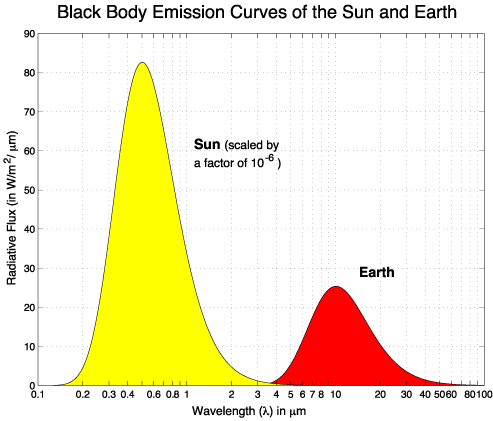

We get the short wave ($sw$) fluxes by integrating over the solar spectrum, so from about $\nu(\lambda = 0.1 \mu m)$ to $\nu(\lambda = 3 \mu m)$ as indicated above. We get the long wave ($lw$) fluxes by integrating over the eart spectrum, so from about $\nu(\lambda = 3 \mu m)$ to $\nu(\lambda = 100 \mu m)$. To do this we have to integrate over $B(\nu, T)$ in the two regimes. But the temperature in $B(\nu, T)$ is the temperature of a thin layer of the atmosphere and we expect this to be approximately the surface temperature of the planet and much smaller than the temperature of the star. Hence we can say:

\begin{equation}
\int_{\nu(\lambda = 3 \mu m)}^{\infty} B(\nu, T) d\nu \approx 0
\label{eq: 23}\tag{23}
\end{equation}

\begin{equation}
\int_{0}^{\nu(\lambda = 3 \mu m)} B(\nu, T) d\nu \approx \int_{0}^{\infty} B(\nu, T) d\nu = \sigma_B T^4
\label{eq: 24}\tag{24}
\end{equation}

And our four equations are:

\begin{equation}
\frac{dF^{\uparrow}_{lw}}{d\tau_{lw}} = -F^{\uparrow}_{lw} + \sigma_B T^4
\label{eq: 25}\tag{25}
\end{equation}

\begin{equation}
\frac{dF^{\downarrow}_{lw}}{d\tau_{lw}} = F^{\downarrow}_{lw} - \sigma_B T^4
\label{eq: 26}\tag{26}
\end{equation}

\begin{equation}
\frac{dF^{\uparrow}_{sw}}{d\tau_{sw}} = -F^{\uparrow}_{sw}
\label{eq: 27}\tag{27}
\end{equation}

\begin{equation}
\frac{dF^{\downarrow}_{sw}}{d\tau_{sw}} = F^{\downarrow}_{sw}
\label{eq: 28}\tag{28}
\end{equation}

The boundary conditions for the short wave equations are $F^{\uparrow}_{sw}(\tau = 0) = AF^{\odot}/4$ and $F^{\downarrow}_{sw}(\tau = 0) = F^{\odot}/4$. This is to satisfy the amount of solar light reflected by the planet and the flux of stellar light that reaches the planet respectively. Using these, [we get](https://github.com/jduffield65/ClimateModel/blob/93531b01aa740f3dede0b2944db8710c083c3a91/Model/radiation/grey.py#L241-L243):

\begin{equation}
F^{\uparrow}_{sw} = \frac{1}{4}AF^{\odot}e^{\tau_{sw}}
\label{eq: 29}\tag{29}
\end{equation}

\begin{equation}
F^{\downarrow}_{sw} = \frac{1}{4}F^{\odot}e^{-\tau_{sw}}
\label{eq: 30}\tag{30}
\end{equation}

The $F$ value to sub into $(11)$ in this case is $F = F^{\uparrow}_{lw} + F^{\uparrow}_{sw} - F^{\downarrow}_{lw} - F^{\downarrow}_{sw}$.

The key here is that $(24)-(25)$ and $(29)-(30)$ depend on different optical depths. So if an atmosphere had no gas that interacted with stellar light, $\tau_{sw}$ would be zero everywhere and $F_{sw}$ would be constant everywhere and just provide a boundary condition for $F_{lw}$ as in equations $(17)-(22)$ i.e. $\frac{\partial F_{sw}}{\partial p} = 0$ so $F_{sw}$ does not appear in equation $(10)$. But if an atmosphere did have a gas that interacted with stellar light, $\tau_{sw}$ would be positive at the surface and thus from $(30)$, it is clear that less radiation will reach the surface causing a cooling effect there.



## Optical depth profiles
As in equation $(11)$, we have the flux at pressure level $i$, $F_i$, and all the flux equations are in terms of optical depth, $\tau$, we need a means of relating $\tau$ to pressure. The model gives four options in the class [OpticalDepthFunctions](https://github.com/jduffield65/ClimateModel/blob/13200ef06bce2a229625108d20d543092265be9d/Model/radiation/grey.py#L684):

### [```scale_height```](https://github.com/jduffield65/ClimateModel/blob/13200ef06bce2a229625108d20d543092265be9d/Model/radiation/grey.py#L705-L732)
This is probably the most physical and is the form used in Atmospheric Circulation Dynamics and General Circulation Models. The form of the function is:

\begin{equation}
\tau = \tau_s \left(\frac{p}{p_s}\right)^{\alpha + 1}
\label{eq: 31}\tag{31}
\end{equation}

Where $\tau_s$ is the optical depth at the surface and $p_s$ is the pressure at the surface which is about 101320 Pa for Earth. The parameter $\alpha$, determines how sharply $\tau$ rises near the surface, a larger value means a steeper rise. $\alpha$ can be explained in more physical terms by considering the corresponding mass concentration of absorbing constituent profile:

\begin{equation}
q = q_s \left(\frac{p}{p_s}\right)^{\alpha} = q_s e^{-z/h}
\label{eq: 32}\tag{32}
\end{equation}

Where $q_s$ is the value at the surface and the $q_s e^{-z/h}$ is valid in an isothermal atmosphere, in which case $h = H / \alpha$ where $h$ is the scale height of the mass concentration and $H$ is the pressure scale height.

The function is called using ```OpticalDepthFunctions.scale_height(p, p_width, tau_surface)[1]```, where the first argument is the pressure levels where you would like $\tau$ to be computed. ```p_width``` is the difference between the pressure level at the surface and the pressure level where mass concentration, $q$ falls to $q_s/e$. [$\alpha$ is then computed from ```p_width```](https://github.com/jduffield65/ClimateModel/blob/13200ef06bce2a229625108d20d543092265be9d/Model/radiation/grey.py#L691-L703).  Note that all the optical depth functions have [multiple outputs](https://github.com/jduffield65/ClimateModel/blob/13200ef06bce2a229625108d20d543092265be9d/Model/radiation/grey.py#L685-L689), hence we only take the second output here. 

Some examples with changing ```p_width``` and ```tau_surface = 4``` is shown on the left in the cell below while examples with changing ```tau_surface``` and ```p_width = 10000``` are shown on the right.

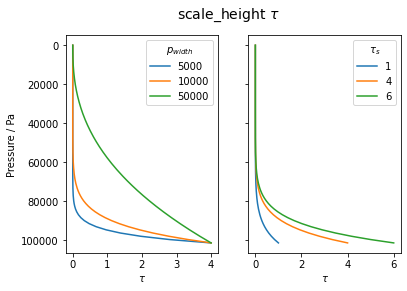

In [2]:
# scale_heigth optical depth plots
from Model.radiation.grey import OpticalDepthFunctions;
from Model.constants import p_surface, p_toa;
import numpy as np
import matplotlib.pyplot as plt
p = np.logspace(np.log10(p_surface), np.log10(p_toa), 500)
p_width_list = [5000, 10000, 50000] # Pa
tau_surface_list = [1,4, 6]

fig, axs = plt.subplots(1, 2, sharey=True)
for p_width in p_width_list:
    tau = OpticalDepthFunctions.scale_height(p, p_width, tau_surface_list[1])[1]
    axs[0].plot(tau, p, label = str(p_width))
for tau_surface in tau_surface_list:
    tau = OpticalDepthFunctions.scale_height(p, p_width_list[1], tau_surface)[1]
    axs[1].plot(tau, p, label = str(tau_surface))
axs[0].invert_yaxis()
axs[0].legend(title=r'$p_{width}$')
axs[1].legend(title=r'$\tau_s$')
axs[0].set_xlabel(r'$\tau$')
axs[1].set_xlabel(r'$\tau$')
axs[0].set_ylabel('Pressure / Pa')
fig.suptitle(r'scale_height $\tau$', fontsize = 14);

### [```exponential```](https://github.com/jduffield65/ClimateModel/blob/13200ef06bce2a229625108d20d543092265be9d/Model/radiation/grey.py#L767-L787)
The form of this is:

\begin{equation}
\tau = \tau_s \frac{e^{\alpha p} - 1}{e^{\alpha p_s} - 1}
\label{eq: 32}\tag{32}
\end{equation}

It has the same arguments as [```scale_height```], so it is called through ```OpticalDepthFunctions.exponential(p, p_width, tau_surface)[1]```. It gives a very similar profile, as shown in the cell below for ```p_width = 10000``` and ```tau_surface = 4```. The reason for including this function is explained in the equilibrium solutions section.


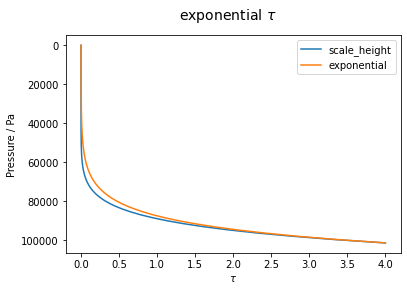

In [2]:
fig, ax = plt.subplots(1, 1)
tau_scale_height = OpticalDepthFunctions.scale_height(p, p_width_list[1], tau_surface_list[1])[1]
tau_exponential = OpticalDepthFunctions.exponential(p, p_width_list[1], tau_surface_list[1])[1]
ax.plot(tau_scale_height, p, label = 'scale_height')
ax.plot(tau_exponential, p, label = 'exponential')
ax.invert_yaxis()
# ax.set_yscale('log')
ax.legend()
ax.set_xlabel(r'$\tau$')
ax.set_ylabel('Pressure / Pa')
fig.suptitle(r'exponential $\tau$', fontsize = 14);

### [peak_in_atmosphere](https://github.com/jduffield65/ClimateModel/blob/13200ef06bce2a229625108d20d543092265be9d/Model/radiation/grey.py#L799-L862)
The form of this is:

\begin{equation}
\tau= 
\begin{cases}
    \tau_s \frac{e^{\alpha(p-p_{max})} - e^{-\alpha p_{max}}}{2 - e^{-\alpha p_{max}} - e^{\alpha (p_{max}-p_s)}} & p\leq p_{max}\\
    \tau_s \frac{2 - e^{-\alpha p_{max}} - e^{\alpha (p_{max}-p)}}{2 - e^{-\alpha p_{max}} - e^{\alpha (p_{max}-p_s)}}              & p > p_{max}
\end{cases}
\label{eq: 33}\tag{33}
\end{equation}

This looks complicated, but it is derived from a simple mass concentration distribution that is peaked somewhere other than the surface:

\begin{equation}
q = q(p_{max})e^{-\alpha |p-p_{max}|}
\label{eq: 34}\tag{34}
\end{equation}

The function is called through ```OpticalDepthFunctions.peak_in_atmosphere(p, p_width, p_max, tau_surface)[1]```. ```p_max``` is the pressure level where the mass concentration distribution is peaked and now ```p_width``` is the difference between ```p_max``` and the pressure level where mass concentration, $q$ falls to $q(p_{max})/e$.

The cell below shows both the $\tau$ and $q$ distributions for ```p_max``` = 50000, ```tau_surface``` = 4 and varying ```p_width```. $q$ was derived assuming that the absoprtion coefficient, $k=1$.

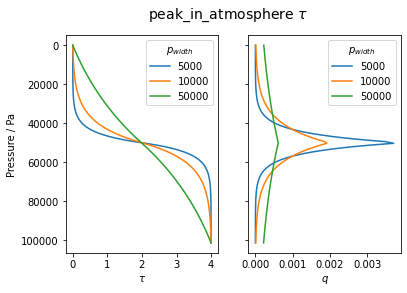

In [3]:
p_max = 50000
fig, axs = plt.subplots(1, 2, sharey=True)
for p_width in p_width_list:
    q, tau, _, _ = OpticalDepthFunctions.peak_in_atmosphere(p, p_width, p_max, tau_surface_list[1], k=1)
    axs[0].plot(tau, p, label = str(p_width))
    axs[1].plot(q, p, label = str(p_width))
axs[0].invert_yaxis()
axs[0].legend(title=r'$p_{width}$')
axs[1].legend(title=r'$p_{width}$')
axs[0].set_xlabel(r'$\tau$')
axs[1].set_xlabel(r'$q$')
axs[0].set_ylabel('Pressure / Pa')
fig.suptitle(r'peak_in_atmosphere $\tau$', fontsize = 14);

### [scale_height_and_peak_in_atmosphere](https://github.com/jduffield65/ClimateModel/blob/13200ef06bce2a229625108d20d543092265be9d/Model/radiation/grey.py#L705-L732)

This is just the addition of ```scale_height``` with ```peak_in_atmosphere```. It is called through ```OpticalDepthFunctions.scale_height_and_peak_in_atmosphere(p, p_width1, tau_surface1, p_width2, p_max2, tau_surface2)[1]```, where the arguments ending 1 correspond to ```scale_height``` and those ending 2 correspond to ```peak_in_atmosphere```.

The below cell shows the $\tau$ and $q$ distributions for ```p_width1``` = 1000, ```tau_surface1``` = 4, ```p_width2``` = 5000, ```p_max2``` = 50000, ```tau_surface2``` = 1.

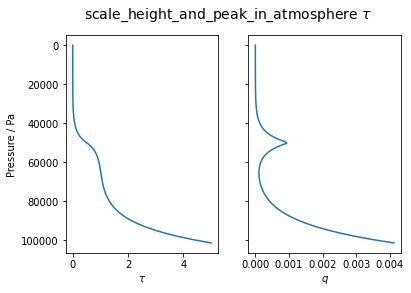

In [5]:
fig, axs = plt.subplots(1, 2, sharey=True)
q, tau, _, _ = OpticalDepthFunctions.scale_height_and_peak_in_atmosphere(p, p_width_list[1], tau_surface_list[1],
                                                                         p_width_list[0], p_max, tau_surface_list[0], k=1)
axs[0].plot(tau, p)
axs[1].plot(q, p)
axs[0].invert_yaxis()
axs[0].set_xlabel(r'$\tau$')
axs[1].set_xlabel(r'$q$')
axs[0].set_ylabel('Pressure / Pa')
fig.suptitle(r'scale_height_and_peak_in_atmosphere $\tau$', fontsize = 14);

## Equilibrium analytic solutions
Equilibrium is reached when $\frac{\partial T}{\partial t} = 0$ so from $(10)$, we require $\frac{\partial F}{\partial p} = 0$ and hence $F$ is a constant and in the absence of heat supplied by the Earth through e.g. radioactive decay, we take the constant to be zero. So we have the four equations $(24) - (28)$ aswell as $F = F^{\uparrow}_{lw} + F^{\uparrow}_{sw} - F^{\downarrow}_{lw} - F^{\downarrow}_{sw} = 0$. That gives us 5 equations in 5 unknowns which we can solve. 

### Non short wave interacting 
In the absence of any short wave interacting gas, $\tau_{sw} = 0$ and it becomes a lot simpler. The [solution](https://github.com/jduffield65/ClimateModel/blob/13200ef06bce2a229625108d20d543092265be9d/Model/radiation/grey.py#L434-L441) is below, where $F_{sw, eqb} = F^{\downarrow}_{sw, eqb} - F^{\uparrow}_{sw, eqb} = (1-A)F^{\odot}/4$:
\begin{equation}
F^{\uparrow}_{lw, eqb} = \frac{1}{2}F_{sw, eqb}(2 + \tau_{lw})\\
F^{\downarrow}_{lw, eqb} = \frac{1}{2}F_{sw, eqb}\tau_{lw}\\
T_{eqb} = \left[\frac{F_{sw, eqb}}{2\sigma_B}(1+\tau_{lw})\right]^{\frac{1}{4}}
\label{eq: 35}\tag{35}
\end{equation}

The below cell shows how you can view the analytic solution. First you need to create an instance of the GreyGas class by providing the optical depth function aswell as the required arguments. You also need to provide the number of grid points in pressure space, ```nz```. If this is set to ```auto```, the number of grid points will be chosen so as to get good coverage in both pressure and optical depth space through the function [```get_p_and_tau_interface_grids```](https://github.com/jduffield65/ClimateModel/blob/13200ef06bce2a229625108d20d543092265be9d/Model/radiation/grey.py#L77-L197).

The equilibrium solution is then obtained through the function [```equilibrium_sol```](https://github.com/jduffield65/ClimateModel/blob/13200ef06bce2a229625108d20d543092265be9d/Model/radiation/grey.py#L382-L442) and is plotted through [```plot_eqb```](https://github.com/jduffield65/ClimateModel/blob/13200ef06bce2a229625108d20d543092265be9d/Model/radiation/grey.py#L444-L492).

In the plot on the right, the negative fluxes correspond to $F^{\downarrow}$ while the positive fluxes correspond to $F^{\uparrow}$.

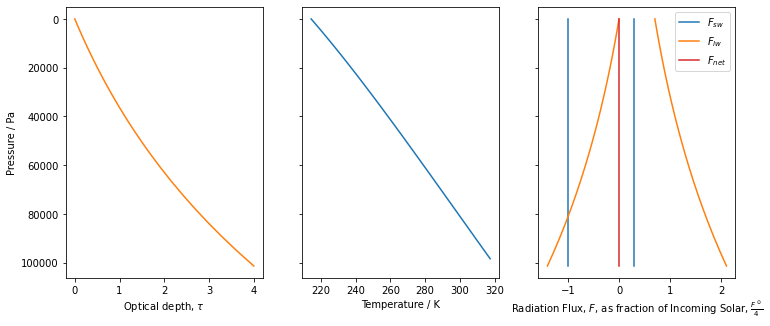

In [3]:
from Model.radiation.grey import GreyGas
p_width_lw = 100000
tau_surface_lw = 4
lw_gas = GreyGas(nz='auto', tau_lw_func=OpticalDepthFunctions.exponential, tau_lw_func_args=[p_width_lw, tau_surface_lw])
up_flux_eqb, down_flux_eqb, T_eqb_lw, up_sw_flux_eqb, down_sw_flux_eqb, correct_solution_lw = lw_gas.equilibrium_sol()
lw_gas.plot_eqb(up_flux_eqb, down_flux_eqb, T_eqb_lw, up_sw_flux_eqb, down_sw_flux_eqb)

### With short wave interacting 
The solution to the 5 equations is a [lot more complicated](https://github.com/jduffield65/ClimateModel/blob/13200ef06bce2a229625108d20d543092265be9d/Model/radiation/grey.py#L1001-L1138) if $\tau_{sw} \neq 0$. First, you need to express all the variables in terms of one of the parameters $p$, $\tau_{lw}$ or $\tau_{sw}$. It is easiest if we use $\tau_{sw}$, and we end up having to compute the following [integral](https://github.com/jduffield65/ClimateModel/blob/13200ef06bce2a229625108d20d543092265be9d/Model/radiation/grey.py#L1092), where $A$ is the albedo:

\begin{equation}
\int_{0}^{\tau_{sw}} \frac{d\tau_{lw}}{d\tau_{sw}'} (e^{-\tau_{sw}'} - Ae^{\tau_{sw}'}) d\tau_{sw}'
\label{eq: 36}\tag{36}
\end{equation}

[To get a solution to this](https://en.wikipedia.org/wiki/List_of_integrals_of_exponential_functions#Integrals_of_polynomials), we require $\frac{d\tau_{lw}}{d\tau_{sw}'}$ is of the form $\sum_n (\tau_{sw}')^n$ where n is always an integer. The [only way](https://github.com/jduffield65/ClimateModel/blob/13200ef06bce2a229625108d20d543092265be9d/Model/radiation/grey.py#L399-L421) we can do this using our ```OpticalDepthFunctions``` is if both $\tau_{lw}$ and $\tau_{sw}$ are exponential and the ratio $\frac{\alpha_{lw}}{\alpha_{sw}}$ is a small integer (< 10, theoretically a solution is possible for larger integers but it takes a long time to compute).

If the optical depth functions supplied do not satisfy this requirement, the returned solution will be that with $\tau_{sw} = 0$ and the value of ```correct_solution``` will be set to ```False``` to indicated the wrong equilibrium has been calculated.

The below cell shows the equilibrium solution obtained by adding a short wave component to the ```lw_gas``` in the above cell. To ensure that the $\alpha$ ratio is an integer, we first need to find $\alpha_{lw}$ using [```get_exponential_alpha```](https://github.com/jduffield65/ClimateModel/blob/13200ef06bce2a229625108d20d543092265be9d/Model/radiation/grey.py#L751-L765), then divide this by an integer before finding the corresponding $p_{width}$ using [```get_exponential_p_width```](https://github.com/jduffield65/ClimateModel/blob/13200ef06bce2a229625108d20d543092265be9d/Model/radiation/grey.py#L734-L749). 

In these plots, the dotted lines show the solution, where $\tau_{sw} = 0$.

It can be seen from this plot that the effect of adding the short wave component is to decrease the temperature at the surface and increase the temperature in the higher atmosphere. The surface temperature decreases because the short wave gas absorbs sunlight, reducing the amount that reaches the surface, as shown by the downward $F_{sw}$ in the plot on the right. This explains why the temperature of the sea decreases as you go deeper. The increase in temperature higher up is because the upward flux of short wave radiation has increased. 

Physically, you can think that the short wave gas is heated by sunlight so if the short wave gas is dominant, the temperature will increase as you move to the top of the atmosphere. Long wave gas is heated by terrestrial light so if long wave gas is dominant, the temperature will increase as you move towards the surface.


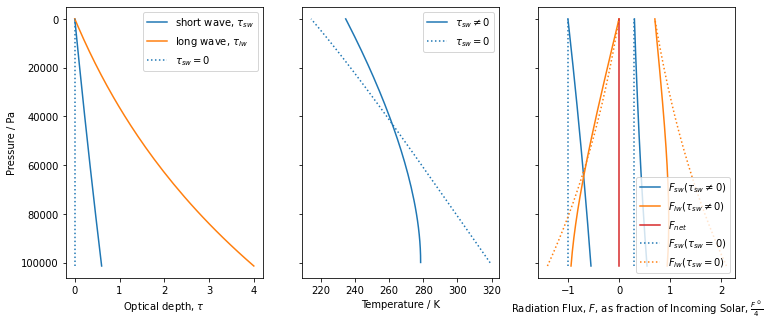

In [4]:
alpha_lw = OpticalDepthFunctions.get_exponential_alpha(p_width_lw)
alpha_sw = alpha_lw / 5
p_width_sw = OpticalDepthFunctions.get_exponential_p_width(alpha_sw)
tau_surface_sw = 0.6
sw_gas = GreyGas(nz='auto', tau_lw_func=OpticalDepthFunctions.exponential, tau_lw_func_args=[p_width_lw, tau_surface_lw],
                 tau_sw_func=OpticalDepthFunctions.exponential, tau_sw_func_args=[p_width_sw, tau_surface_sw])
up_flux_eqb, down_flux_eqb, T_eqb_sw, up_sw_flux_eqb, down_sw_flux_eqb, correct_solution_sw = sw_gas.equilibrium_sol()
sw_gas.plot_eqb(up_flux_eqb, down_flux_eqb, T_eqb_sw, up_sw_flux_eqb, down_sw_flux_eqb)

# Evolution to equilibrium
We can use equation $(11)$ to investigate how temperature evolves with time if the initial state of the atmosphere was not in equilibrium. 

## Long wave only
An example for ```lw_gas``` initialised in the previous section is shown below. The temperature is adjusted at each time step using the function [```update_temp(t, T_initial)```](https://github.com/jduffield65/ClimateModel/blob/13200ef06bce2a229625108d20d543092265be9d/Model/radiation/grey.py#L246-L302). ```t``` is just the current time and ```T_initial``` is the starting temperature profile, and is only necessary if ```t=0```. If ```T_initial``` is not provided, the initial profile will be an [isothermal atmosphere](https://github.com/jduffield65/ClimateModel/blob/13200ef06bce2a229625108d20d543092265be9d/Model/radiation/grey.py#L199-L201) such that $F^{\uparrow}_{lw} + F^{\uparrow}_{sw} = F^{\downarrow}_{sw}$ at the top of the atmosphere. 

This function will find the fluxes corresponding to the current temperature profile and then automatically find a time step such that exactly one pressure level has a temperature change of 1 Kelvin and all other levels have a smaller temperature change. This time step is found through the function [```update_time_step```](https://github.com/jduffield65/ClimateModel/blob/13200ef06bce2a229625108d20d543092265be9d/Model/radiation/grey.py#L304-L366) and the max temperature change will be lowered from 1 Kelvin if convergence isn't happening. 

```update_temp``` returns the time updated by the timestep aswell as ```delta_net_flux``` which indicates by how much the net flux, $F$, is changing. The idea being that when this value is small equilibrium has been reached. In fact, the function[```check_equilibrium(delta_net_flux, flux_thresh)```](https://github.com/jduffield65/ClimateModel/blob/66ce02ebbfc61ab36b704960d433e81290059f3c/Model/radiation/grey.py#L382-L398) explicitly checks for equilibrium by returning ```True``` if ```delta_net_flux < flux_thresh```.

The evolution of the temperature is plotted by getting an array of all the times and temperatures then running [```plot_animate(T_array, t_array, T_eqb, correct_solution, log_axis=True, nPlotFrames=100)```](https://github.com/jduffield65/ClimateModel/blob/66ce02ebbfc61ab36b704960d433e81290059f3c/Model/radiation/grey.py#L512-L699). This then finds ```nPlotFrames``` (100 by default) suitable times to plot from all those in ```T_array```. The ```log_axis``` parameter determines whether to plot pressure on a log scale, it is set to ```True``` by default. ```T_eqb``` does not have to be supplied but helps check if the analytical solution is being approached.



In [5]:
# Start lw_gas at isothermal and evolve to equilibrium
t = 0
flux_thresh = 0.1
t_array_lw = [0]
T_array_lw = [lw_gas.T.copy()]
equilibrium = False
while not equilibrium:
    t, delta_net_flux = lw_gas.update_temp(t)
    t_array_lw.append(t)
    T_array_lw.append(lw_gas.T.copy())
    equilibrium = lw_gas.check_equilibrium(delta_net_flux, flux_thresh)
    if min(lw_gas.T)[0] < 0:
        raise ValueError('Temperature is below zero')

In [16]:
#%%capture # to stop plot from showing
from IPython.display import HTML
#rc('animation', html='html5')
anim_lw = lw_gas.plot_animate(T_array_lw, t_array_lw, T_eqb_lw, correct_solution_lw); plt.close();
HTML(anim_lw.to_jshtml())

## Short wave analytic

We can do the same thing for the ```sw_gas``` initialised just below equation $(36)$, as given by the next cell, for which we also have a correct analytical solution.

In [12]:
# Start sw_gas at isothermal and evolve to equilibrium
t = 0
flux_thresh = 0.1
t_array_sw = [0]
T_array_sw = [sw_gas.T.copy()]
equilibrium = False
while not equilibrium:
    t, delta_net_flux = sw_gas.update_temp(t)
    t_array_sw.append(t)
    T_array_sw.append(sw_gas.T.copy())
    equilibrium = sw_gas.check_equilibrium(delta_net_flux, flux_thresh)
    if min(sw_gas.T)[0] < 0:
        raise ValueError('Temperature is below zero')

In [17]:
#%%capture
anim_sw = sw_gas.plot_animate(T_array_sw, t_array_sw, T_eqb_sw, correct_solution_sw); plt.close();
HTML(anim_sw.to_jshtml())

## Stratosphere
If we don't require an analytic solution, we can obtain more interesting atmospheric structures. In the cell below, we include a gas that absorbs short wave radiation at a pressure level of 2,000 Pa. This then causes a temperature inversion, analagous to the role of ozone in our stratosphere. 

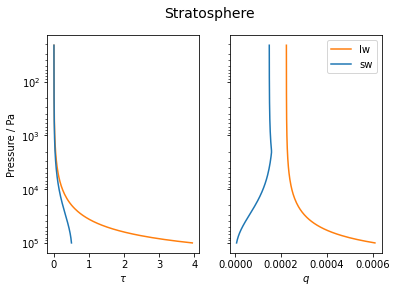

In [21]:
# Atmosphere with stratosphere
stratosphere = GreyGas(nz='auto', tau_lw_func=OpticalDepthFunctions.exponential,
                                          tau_lw_func_args=[100000, 4], tau_sw_func=OpticalDepthFunctions.peak_in_atmosphere,
                                          tau_sw_func_args=[30000, 2000, 0.5])
def plot_tau_and_q(gas, title, log_scale = True):
    """Function to show optical depth and mass concentration profiles"""
    lw_color = '#ff7f0e'
    sw_color = '#1f77b4'
    fig, axs = plt.subplots(1, 2, sharey=True)
    axs[0].plot(gas.tau, gas.p, color = lw_color)
    axs[1].plot(gas.q, gas.p, label = 'lw', color = lw_color)
    if not gas.sw_tau_is_zero:
        axs[0].plot(gas.tau_sw, gas.p, color = sw_color)  
        axs[1].plot(gas.q_sw, gas.p, label = 'sw', color = sw_color)
        axs[1].legend()
    axs[0].invert_yaxis()
    axs[0].set_xlabel(r'$\tau$')
    axs[1].set_xlabel(r'$q$')
    axs[0].set_ylabel('Pressure / Pa')
    if log_scale:
        axs[0].set_yscale('log')
        axs[1].set_yscale('log')
    fig.suptitle(title, fontsize = 14);
plot_tau_and_q(stratosphere, 'Stratosphere', True)

AttributeError: 'GreyGas' object has no attribute 'copy'